/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1 completed.
Epoch 2 completed.
Epoch 3 completed.
Epoch 4 completed.
Epoch 5 completed.
Epoch 6 completed.
Epoch 7 completed.
Epoch 8 completed.
Epoch 9 completed.
Epoch 10 completed.
Epoch 11 completed.
Epoch 12 completed.
Epoch 13 completed.
Epoch 14 completed.
Epoch 15 completed.
Epoch 16 completed.
Epoch 17 completed.
Epoch 18 completed.
Epoch 19 completed.
Epoch 20 completed.
Epoch 21 completed.
Epoch 22 completed.
Epoch 23 completed.
Epoch 24 completed.
Epoch 25 completed.
Epoch 26 completed.
Epoch 27 completed.
Epoch 28 completed.
Epoch 29 completed.
Epoch 30 completed.
Epoch 31 completed.
Epoch 32 completed.
Epoch 33 completed.
Epoch 34 completed.
Epoch 35 completed.
Epoch 36 completed.
Epoch 37 completed.
Epoch 38 completed.
Epoch 39 completed.
Epoch 40 completed.
Epoch 41 completed.
Epoch 42 completed.
Epoch 43 completed.
Epoch 44 completed.
Epoch 45 completed.
Epoch 46 completed.
Epoch 47 completed.
Epoch 48 completed.
Epoch 49 completed.
Epoch 50 completed.
Epoch 51 

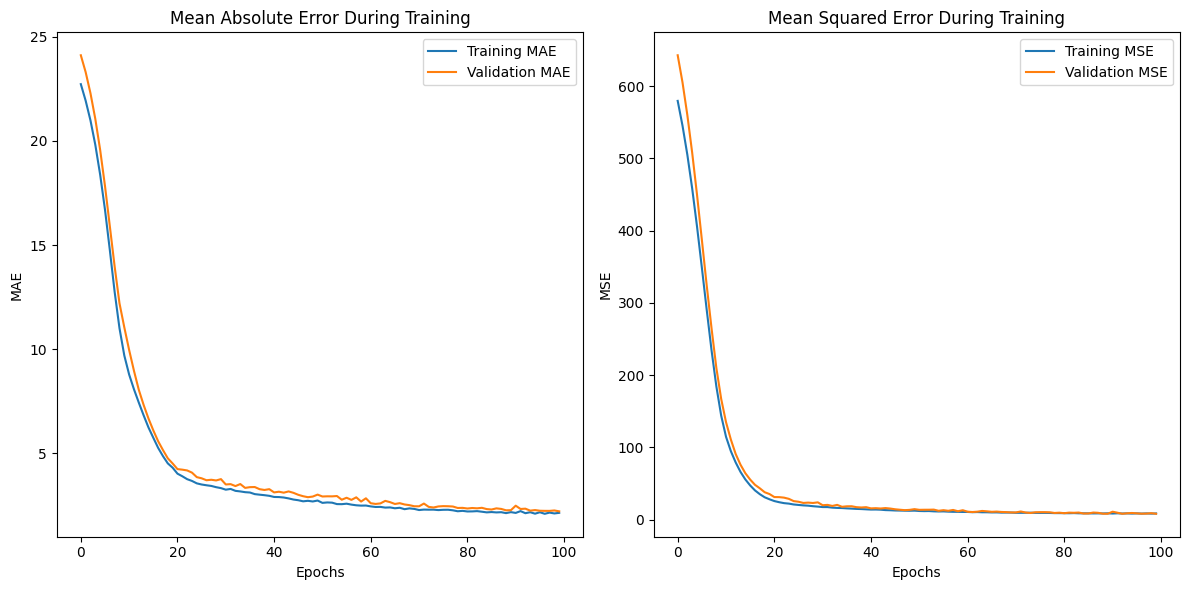

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
   'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names,
   na_values='?', comment='\t', sep=' ', skipinitialspace=True)

# Drop missing values
dataset = raw_dataset.dropna()

# Separate the dataset into features and labels
features = dataset.drop(['MPG'], axis=1)
labels = dataset['MPG']

# Normalize the features using min-max scaling
normalized_features = (features - features.min()) / (features.max() - features.min())

# Split the dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(normalized_features, labels, test_size=0.2, random_state=42)

# Define the model architecture for regression
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_features.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output a single MPG value
])

# Model compilation
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(
    loss='mean_squared_error', optimizer=optimizer, metrics=['mae', 'mse']
)

# Custom callback to print epoch number
class PrintEpochCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} completed.")

# Train the model
history = model.fit(
    train_features, train_labels,
    epochs=100, validation_split=0.2, verbose=0,
    callbacks=[PrintEpochCallback()]
)

# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(test_features, test_labels)

# Predict MPG values for the test set
predicted_mpg = model.predict(test_features)

# Calculate evaluation metrics
mae = mean_absolute_error(test_labels, predicted_mpg)
mse = mean_squared_error(test_labels, predicted_mpg)
r2 = r2_score(test_labels, predicted_mpg)

# Print the test metrics
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"R^2 Score: {r2}")

# Example: Predict the MPG of a new car
new_car_features = pd.DataFrame([[4, 121, 110, 2800, 15.4, 81, 3]], columns=column_names[1:])
normalized_new_car_features = (new_car_features - features.min()) / (features.max() - features.min())
new_car_prediction = model.predict(normalized_new_car_features)

# Print the predicted MPG
print("Predicted MPG:", new_car_prediction[0][0])

# Plot MAE and MSE during training
plt.figure(figsize=(12, 6))

# Plot MAE
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error During Training')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plot MSE
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error During Training')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()